## Importing the important packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [26]:
dataset = pd.read_csv('dataset/dataset_for_ML.csv')

In [27]:
dataset.head()

,Unnamed: 0,Item_MRP_a,Item_MRP_b,Item_MRP_c,Item_MRP_d,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,...,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Outlet_Sales
0,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,3735.1380
1,1,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,443.4228
2,2,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,2097.2700
3,3,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,732.3800
4,4,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,994.7052


In [28]:
# Now we can see while importng we got an unnecessary column and we can get rid of that column by deleting that column.

del dataset['Unnamed: 0']


In [29]:
# splitting the dataset into training and testing dataset.

train, test = train_test_split(dataset, test_size = 0.20, random_state = 2019)

In [30]:
# checking the shape of training and testing dataset.

train.shape , test.shape

((6816, 34), (1705, 34))

In [31]:
# creating the label dataset for training and testing dataset.

train_label = train['Item_Outlet_Sales']
test_label = test['Item_Outlet_Sales']

In [32]:
# removing the label dataset from training and testing dataset.

del train['Item_Outlet_Sales']
del test['Item_Outlet_Sales']

In [33]:
# Now we can check the shape of training and testing dataset.

train.shape , test.shape

((6816, 33), (1705, 33))

## Now after getting the dataset in accurate from, we can start implementing our ML approaches.

In [37]:
# Importing Cross validation score and means square error from the SKLearn Library.

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [76]:
# Let's create a method to evaluate the performance of each model so, we don't have to write the duplicate code.

def modelfit(model, train, test, train_label, test_label, model_name, graph_flag ):
    
    # fitting the model on training dataset.
    model.fit( train, train_label)
    
    # checking the model on testing dataset.
    predict_model = model.predict(test)
    
    # let's find the mean square error
    mse = mean_squared_error(test_label, predict_model)
    
    #Printing Model Report:
    print ('\nModel Report For ', (model_name), '\n\n')
    print("RMSE : %.4g" % np.sqrt(mse))
    # let's find the 
    c_val_score = score = np.sqrt(-(cross_val_score(model, train, train_label, cv = 10, scoring = 'neg_mean_squared_error')))
    print( 'CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g' % (np.mean(c_val_score), np.std(c_val_score), np.min(c_val_score), np.max(c_val_score)))
    if graph_flag:
        fig, axes = plt.subplots(1, 1, figsize=(12,8))
        coef1 = pd.Series(model.coef_, train.columns).sort_values()
        coef1.plot(kind='bar', title='Model Coefficients')

## Linear Regression Model


Model Report For  Linear Regression 


RMSE : 1171
CV Score : Mean - 1150 | Std - 31.53 | Min - 1105 | Max - 1216


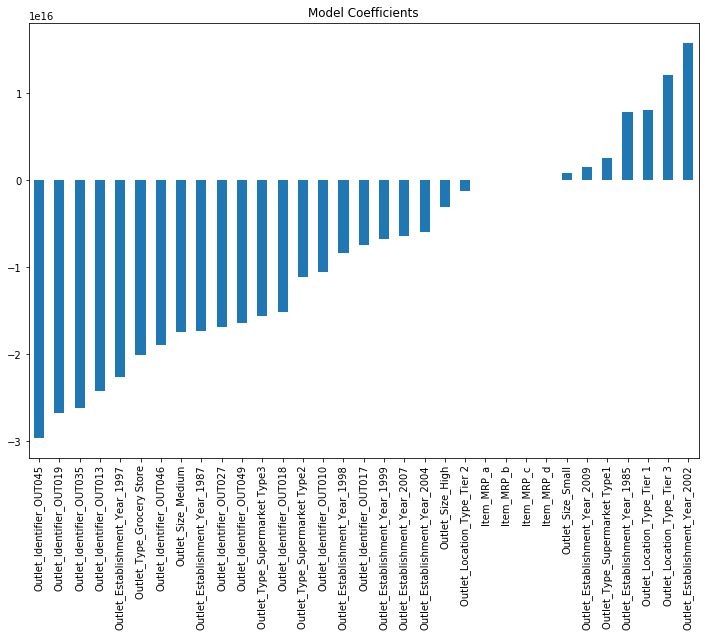

In [77]:
# Importing the Linear Regression Model.

from sklearn.linear_model import LinearRegression


# Initialize the Empty linear Regression Model.

linear_regression = LinearRegression()
# Checking the performance of the model.
modelfit(linear_regression, train, test, train_label, test_label, "Linear Regression", True)

## Ridge Model.


Model Report For  Ridge Model 


RMSE : 1171
CV Score : Mean - 1148 | Std - 33.21 | Min - 1104 | Max - 1214


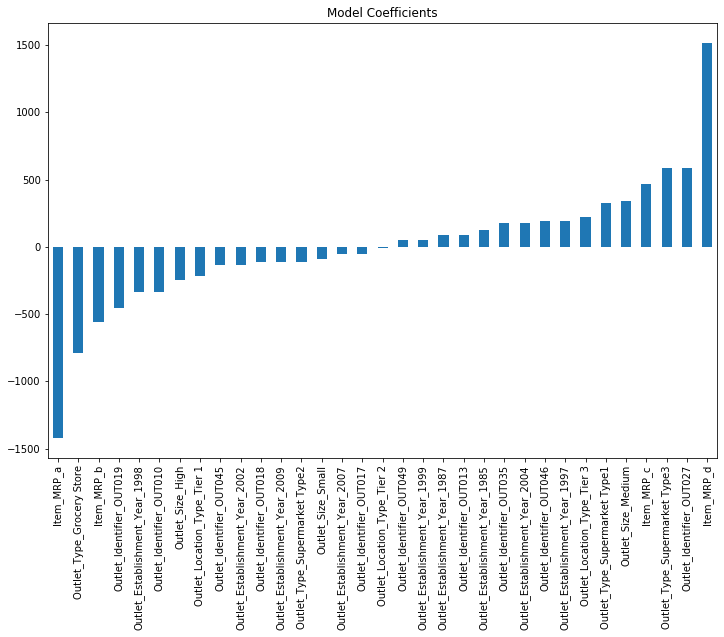

In [79]:
# Importing the Ridge Model.
from sklearn.linear_model import Ridge

# Initializing the Ridge Model
ridge_model = Ridge(alpha = 0.05, solver = 'cholesky')

# Evaluating the Ridge Model.
modelfit(ridge_model, train, test, train_label, test_label, "Ridge Model", True)

## LASSO Model


Model Report For  Lasso Model 


RMSE : 1171
CV Score : Mean - 1148 | Std - 33.22 | Min - 1104 | Max - 1214


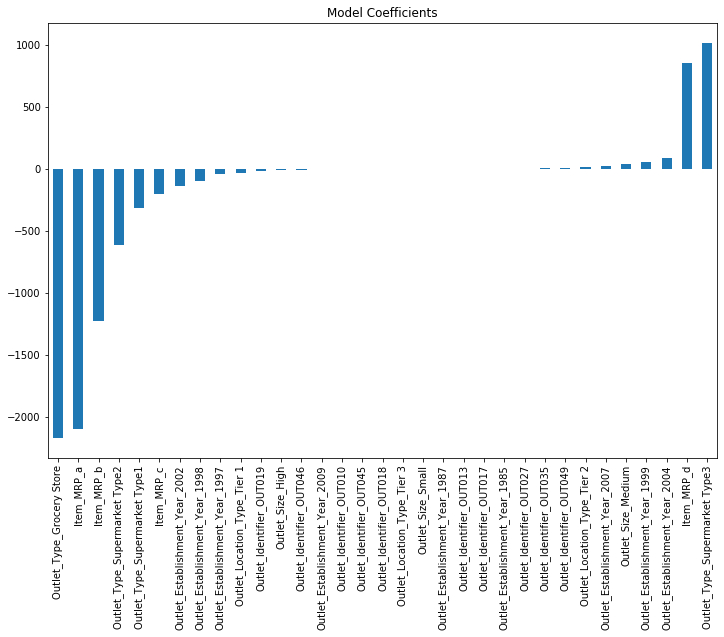

In [80]:
# Importing the Lasso Model

from sklearn.linear_model import Lasso

# Initializing the Lasso model
lasso_model = Lasso(alpha = 0.01)

# Evaluating the Lasso Model
modelfit(lasso_model, train, test, train_label, test_label, "Lasso Model", True)

## Bagging Regression Model

In [87]:
# Importing the Bagging Regressor Model

from sklearn.ensemble import BaggingRegressor

# Initializing the BaggingRegressor Model
br = BaggingRegressor(max_samples = 70)

# Evaluating the bagging Regressor Model
modelfit(br, train, test, train_label, test_label,"BaggingRegressor Model", False)


Model Report For  BaggingRegressor Model 


RMSE : 1151
CV Score : Mean - 1157 | Std - 45.06 | Min - 1074 | Max - 1207


## SVR Model

In [78]:
# Importing the SVR

from sklearn.svm import SVR

# Initializing the SVR Model
svr = SVR(epsilon = 15, kernel = 'linear')

# Evaluating the SVR Model.
modelfit(svr, train, test, train_label, test_label, 'SVR Model', False)


Model Report For  SVR Model 


RMSE : 1436
CV Score : Mean - 1392 | Std - 45.67 | Min - 1332 | Max - 1489


## Decision Tree

In [82]:
# Importing the DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

# Initializing the Decision Tree Regressor

dtr = DecisionTreeRegressor()

# Evaluating the Decision Tree Regressor

modelfit(dtr, train, test, train_label, test_label, 'DTR Model', False)


Model Report For  DTR Model 


RMSE : 1123
CV Score : Mean - 1097 | Std - 32.99 | Min - 1047 | Max - 1155


## Random Forest

In [85]:
# Importing the RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

#Initializing the RandomForestRegressor

rf = RandomForestRegressor()

# Evaluating the RandomForestRegressor

modelfit(rf, train, test, train_label, test_label, 'RandomForestRegressor', False)


Model Report For  RandomForestRegressor 


RMSE : 1123
CV Score : Mean - 1097 | Std - 32.69 | Min - 1047 | Max - 1154


## ADA Boosting

In [89]:
# importing adaptive boosting regressor algorithm

from sklearn.ensemble import AdaBoostRegressor

# initializing adaboosting algorithm
ada = AdaBoostRegressor()
# evaluating adaboosting
modelfit(ada, train, test, train_label, test_label, 'Adaptive Boosting Model', False)


Model Report For  Adaptive Boosting Model 


RMSE : 1195
CV Score : Mean - 1181 | Std - 28.9 | Min - 1121 | Max - 1216


## Gradient Boosting

In [92]:
# Importing Gradient Boosting

from sklearn.ensemble import GradientBoostingRegressor

# Initializing Gradient Boosting

gbr = GradientBoostingRegressor()

# Evaluatin Gradient Boosting Algorithm
modelfit(gbr, train, test, train_label, test_label, 'Gradient Boosting Model', False)


Model Report For  Gradient Boosting Model 


RMSE : 1123
CV Score : Mean - 1097 | Std - 33.25 | Min - 1046 | Max - 1155


# Now after checking the performance of each algorithm lets trained out whole model on complete training set and import testing dataset and preprocess it for getting the predictions.

In [94]:
# importing the test dataset.

df_test = pd.read_csv('dataset/test.csv')

In [95]:

# checking the shape of test dataset.
df_test.shape

(5681, 11)

In [98]:
# checking the top 5 rows of testing dataset.

df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [102]:
# making a list of the attributes which can effect the sales.

attributes = ['Item_MRP',
 'Outlet_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Establishment_Year',
 'Outlet_Identifier',
 'Item_Type']

In [104]:
# limiting the dataset to only those attributes which can effect the sale of the outlet.

df_test = df_test[attributes]

In [106]:
# checking the shape of the sales.

df_test.shape

(5681, 7)

In [109]:
# checking the info about the test dataset

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 7 columns):
Item_MRP                     5681 non-null float64
Outlet_Type                  5681 non-null object
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Identifier            5681 non-null object
Item_Type                    5681 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 310.8+ KB


In [110]:
# changing the data type of the attributes to the categorical data type.

df_test.Item_MRP = pd.cut(df_test.Item_MRP,bins=[25,75,140,205,270],labels=['a','b','c','d'],right=True)
df_test.Item_Type = df_test.Item_Type.astype('category')
df_test.Outlet_Size = df_test.Outlet_Size.astype('category')
df_test.Outlet_Identifier = df_test.Outlet_Identifier.astype('category')
df_test.Outlet_Establishment_Year = df_test.Outlet_Establishment_Year.astype('category')
df_test.Outlet_Type = df_test.Outlet_Type.astype('category')
df_test.Outlet_Location_Type = df_test.Outlet_Location_Type.astype('category')

In [111]:
# again chacking the info of the test dataset.

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 7 columns):
Item_MRP                     5681 non-null category
Outlet_Type                  5681 non-null category
Outlet_Size                  4075 non-null category
Outlet_Location_Type         5681 non-null category
Outlet_Establishment_Year    5681 non-null category
Outlet_Identifier            5681 non-null category
Item_Type                    5681 non-null category
dtypes: category(7)
memory usage: 41.0 KB


In [112]:
# making a function to replace the null value in the outlet_size attribute

def function_replacing_null_Values(x):
    if x == 'OUT010' :
        return 'High'
    elif x == 'OUT045' :
        return 'Medium'
    elif x == 'OUT017' :
        return 'Medium'
    elif x == 'OUT013' :
        return 'High'
    elif x == 'OUT046' :
        return 'Small'
    elif x == 'OUT035' :
        return 'Small'
    elif x == 'OUT019' :
        return 'Small'
    elif x == 'OUT027' :
        return 'Medium'
    elif x == 'OUT049' :
        return 'Medium'
    elif x == 'OUT018' :
        return 'Medium'

In [113]:
# using Function to fill null values.

df_test['Outlet_Size'] = df_test.Outlet_Identifier.apply(function_replacing_null_Values)

In [114]:
# making hot encoded vectors from the categorical variables.

test_data = pd.get_dummies(df_test.iloc[:,0:6])

In [123]:
# checking the shape of the test_data

test_data.shape

(5681, 33)

## Now after preprocessing the test dataset, we can get our complete dataset of training and lets train the gradient boosting algorithm on complete.

In [116]:
# first lets create the labeled dataset from the training set.

train_label = dataset['Item_Outlet_Sales']

,Item_MRP_a,Item_MRP_b,Item_MRP_c,Item_MRP_d,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,...,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Outlet_Sales
0,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,3735.1380
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,443.4228
2,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,2097.2700
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,732.3800
4,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,994.7052


In [118]:
# let's remove the labeled dataset from the training set.

del dataset['Item_Outlet_Sales']

In [120]:
# after removing the dataset let's check the shape of training set.

dataset.shape

(8521, 33)

In [122]:
# to verify let's check the shape of test set.

test_data.shape

(5681, 33)

In [119]:
# and train label shape.

train_label.shape

(8521,)

## Let's train Gradient Boosting Algorithm and take the predictions and add it to the submission file.

In [126]:
# Importing Gradient Boosting and GradientSearchCV

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Initializing Gradient Boosting

gb = GradientBoostingRegressor(max_depth = 7, n_estimators=200, learning_rate = 0.01)

# making a list of params for the Gradient Search CV
param = [{'min_samples_split': [5, 9, 13], 'max_leaf_nodes': [3, 5, 7, 9], 'max_features': [8, 10, 15, 18]}]

# initializing the GradientSearchCV with the params
gs = GridSearchCV(gb, param, cv = 5, scoring = 'neg_mean_squared_error')

In [127]:
    
# fitting the model on training dataset.
gs.fit(dataset, train_label)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.01,
                                                 loss='ls', max_depth=7,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=200,
                                                 n_iter_...ne,
                         

In [128]:
gb = gs.best_estimator_

In [129]:
# getting the output of testing dataset after training.

predict = gb.predict(test_data)

In [130]:
# checking the shape of the predictions.

predict.shape

(5681,)

In [133]:
# importing the submission dataset.

df_submission = pd.read_csv('dataset/submission.csv')

In [134]:
# checking the shape of the submission dataset.

df_submission.shape

(5681, 4)

In [136]:
# checking the top 10 rows of the submission dataset.

df_submission.head(10)

,Unnamed: 0,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,0,FDW58,OUT049,1636.244023
1,1,FDW14,OUT017,1409.355910
2,2,NCN55,OUT010,710.594286
3,3,FDQ58,OUT017,2355.184955
4,4,FDY38,OUT027,5857.916205
5,5,FDH56,OUT046,1853.228827
6,6,FDL48,OUT018,733.598282
7,7,FDC48,OUT027,2273.425151
8,8,FDN33,OUT045,1499.740111
9,9,FDA36,OUT017,3203.582302


In [139]:
# we can see, we have an unnecessary column Unnamed: 0, we can del that column

del df_submission['Unnamed: 0']

In [137]:
# creating a new column in the submission dataset, for saving the predicted sales value.

df_submission['Item_Outlet_Sales_Predicted'] = predict

In [140]:
# checking the top 10 values.

df_submission.head(10)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales,Item_Outlet_Sales_Predicted
0,FDW58,OUT049,1636.244023,1745.354231
1,FDW14,OUT017,1409.355910,1745.354231
2,NCN55,OUT010,710.594286,700.963057
3,FDQ58,OUT017,2355.184955,2679.345907
4,FDY38,OUT027,5857.916205,5433.756941
5,FDH56,OUT046,1853.228827,1745.354231
6,FDL48,OUT018,733.598282,975.824869
7,FDC48,OUT027,2273.425151,2659.351363
8,FDN33,OUT045,1499.740111,1745.354231
9,FDA36,OUT017,3203.582302,2679.345907


In [141]:
df_submission.to_csv('predicted_dataset.csv')